# Taxi trips from/to Manhatten

In [1]:
import setup

def manhatten_pu(month):
    return month.loc[(month.PULocationID.isin(setup.manhatten)) & (month['passenger_count'] > 0)]['DOLocationID'].value_counts()

def manhatten_do(month): 
    return month.loc[(month.DOLocationID.isin(setup.manhatten)) & (month['passenger_count'] > 0)]['PULocationID'].value_counts()

def devide_districts(month):
    districts = [[],[],[],[],[]]
    for zone in month.keys():
        for district in range(5):
            if zone in setup.districts[district]:
                districts[district].append(month[zone])
    for district in range(5):
        districts[district] = sum(districts[district])
    return districts

def sum_up(districts, month):
    for district in range(5):
        districts[district] += month[district]
    return districts

def percentages(districts):
    tmp = sum(districts)
    average = []
    for district in range(5):
        average.append(districts[district] / tmp * 100)
    return average

def result(manhatten_percentages, districts_manhatten, title):
    print('-------------------- YEAR AVERAGE --------------------')
    print(manhatten_percentages, '\n\n')
    for index in range(12):
        print('--------------------', setup.month_labels[index], '--------------------')
        print(percentages(districts_manhatten[index]), '\n')
    fig = setup.plt.figure(figsize=(10, 10))
    setup.plt.title(title)
    setup.plt.pie(manhatten_percentages, colors=setup.district_colors)
    setup.plt.legend(setup.district_labels,loc=3)
    setup.plt.show()

# From Manhatten

-------------------- YEAR AVERAGE --------------------
[0.5196176019830623, 2.8553191387562933, 93.16690484263097, 3.4320652628964616, 0.02609315373321523] 


-------------------- JANUARY --------------------
[0.46675525727262224, 2.750196932580909, 93.69162785808986, 3.0692701874438093, 0.022149764612790543] 

-------------------- FEBRUARY --------------------
[0.4668675246986219, 2.7522863027752833, 93.56590433174232, 3.1933229090996074, 0.02161893168417588] 

-------------------- MARCH --------------------
[0.5269205552227726, 2.811167176223778, 93.16237400245242, 3.473782162830722, 0.025756103270293606] 

-------------------- APRIL --------------------
[0.5256375954878504, 2.8418935959101743, 93.18708359978548, 3.4212935356809915, 0.024091673135504862] 

-------------------- MAY --------------------
[0.5480177417820664, 2.9268124226402197, 92.88342733133523, 3.6168056189176205, 0.024936885324861095] 

-------------------- JUNE --------------------
[0.5395068562115594, 2.93448680193

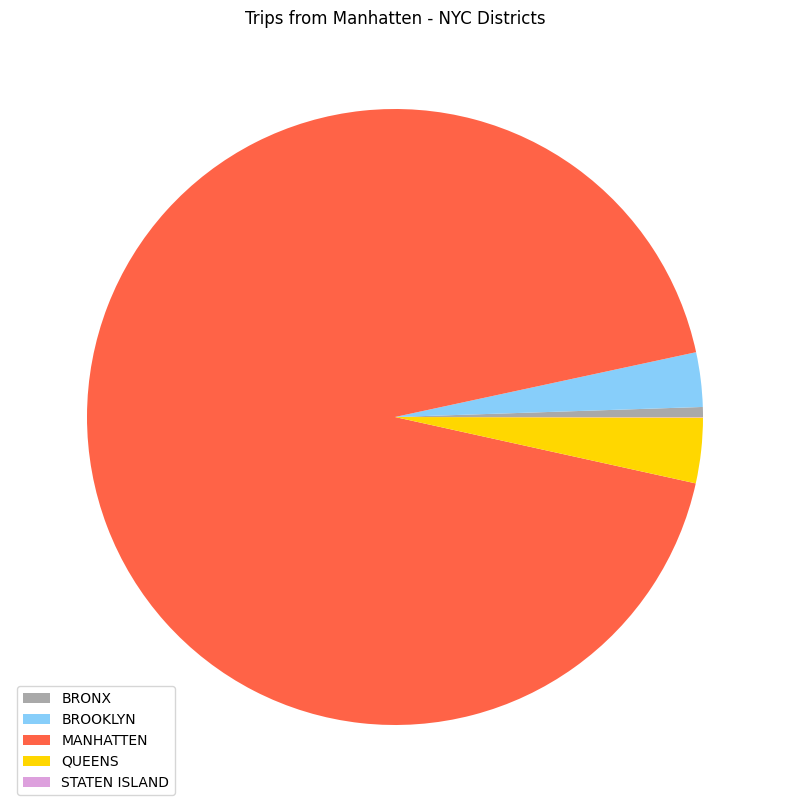

In [2]:
from_manhatten = []
for month in setup.year:
    from_manhatten.append(manhatten_pu(month))
districts_from_manhatten = []
for month in from_manhatten:
    districts_from_manhatten.append(devide_districts(month))
percentages_districts_from_manhatten = [0,0,0,0,0]
for month in districts_from_manhatten:
    percentages_districts_from_manhatten = sum_up(percentages_districts_from_manhatten, month)
result(percentages(percentages_districts_from_manhatten), districts_from_manhatten,'Trips from Manhatten - NYC Districts')

# To Manhatten

-------------------- YEAR AVERAGE --------------------
[0.0489232830660387, 0.41958434359192887, 95.39150956919354, 4.138883917425399, 0.0010988867230936278] 


-------------------- JANUARY --------------------
[0.024848391756866848, 0.35145503082717144, 95.7857153504602, 3.8377349465992894, 0.0002462803564843349] 

-------------------- FEBRUARY --------------------
[0.02425089388528368, 0.3438696804931406, 95.902958049418, 3.7287881295338847, 0.00013324666969936086] 

-------------------- MARCH --------------------
[0.04371303272154871, 0.400297040292176, 95.6396946313395, 3.915617010849771, 0.0006782847970093455] 

-------------------- APRIL --------------------
[0.046281158035063004, 0.41846902861714186, 95.2982662356744, 4.236406903646973, 0.0005766740264178053] 

-------------------- MAY --------------------
[0.048270016266623215, 0.445200936661673, 95.11942982315182, 4.386367107991939, 0.0007321159279513547] 

-------------------- JUNE --------------------
[0.047762602487841796, 

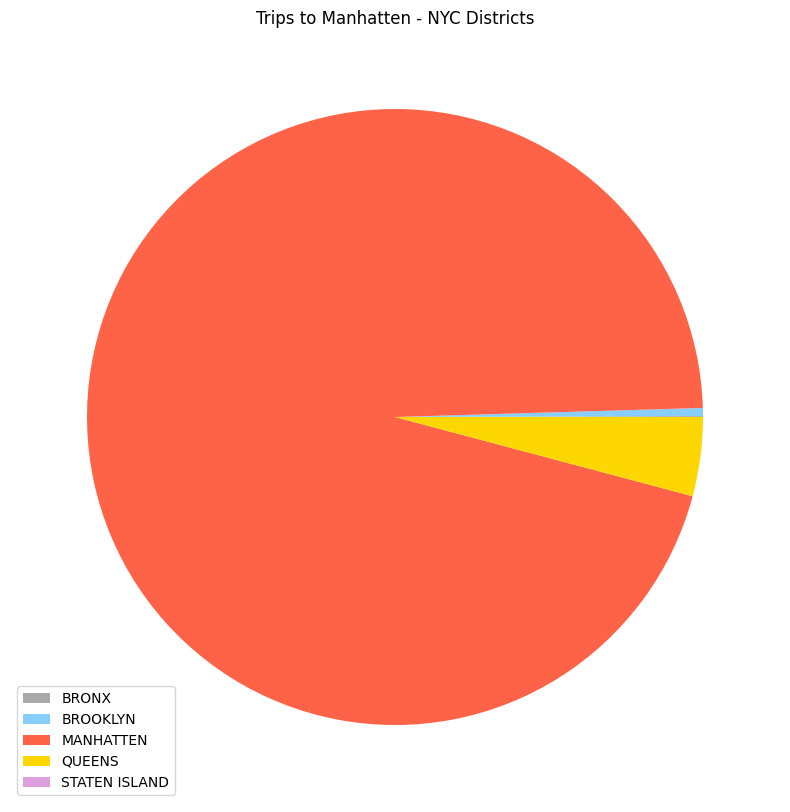

In [3]:
to_manhatten = []
for month in setup.year:
    to_manhatten.append(manhatten_do(month))
districts_to_manhatten = []
for month in to_manhatten:
    districts_to_manhatten.append(devide_districts(month))
percentages_districts_to_manhatten = [0,0,0,0,0]
for month in districts_to_manhatten:
    percentages_districts_to_manhatten = sum_up(percentages_districts_to_manhatten, month)
result(percentages(percentages_districts_to_manhatten), districts_to_manhatten,'Trips to Manhatten - NYC Districts')